<a href="https://colab.research.google.com/github/estebanvz/alura-deep-learning-2/blob/master/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [57]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

# Dataset y Normalización

In [58]:
dataset = keras.datasets.fashion_mnist
((img_entrenamiento, etiquetas_entrenamiento),(img_test, etiquetas_test)) = dataset.load_data()
img_entrenamiento = img_entrenamiento/255.0
img_test = img_test/255.0
img_entrenamiento.shape, img_test.shape

((60000, 28, 28), (10000, 28, 28))

# Cargar Modelo

In [59]:
modelo_caro = keras.models.load_model("/content/drive/MyDrive/alura/deep_learning_2/modelo_inicial_caro.h5")

In [60]:
modelo_caro.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-tra

# Modelo Tiny

In [ ]:
tiny = keras.Sequential()
tiny.add(keras.layers.Input(3,))
tiny.add(keras.layers.Dense(3,kernel_initializer="GlorotNormal"))
tiny.add(keras.layers.Dense(2,))
tiny.predict(np.array([[0.5,0.3,0.2]]))

array([[0.26, 0.07]], dtype=float32)

In [ ]:
tiny.layers[0].get_weights()[0].shape

(3, 3)

In [ ]:
tiny.layers[1].get_weights()[0].shape

(3, 2)

In [ ]:
([0.5,0.3,0.2] @ tiny.layers[0].get_weights()[0]) @ tiny.layers[1].get_weights()[0]

array([-0.05,  0.1 ])

In [ ]:
tiny.layers[1].get_weights()

[array([[ 0.63, -0.59],
        [-0.44,  0.32],
        [-1.02,  1.08]], dtype=float32), array([0., 0.], dtype=float32)]

## Bias

In [ ]:
tiny.layers[0].get_weights()[1]

array([0., 0., 0.], dtype=float32)

In [ ]:
tiny.layers[1].get_weights()[1]

array([0., 0.], dtype=float32)

In [ ]:
tiny.layers[0].get_config()

{'activation': 'linear',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotNormal',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_3',
 'trainable': True,
 'units': 3,
 'use_bias': True}

In [ ]:
tiny.layers[0].get_weights()

[array([[-0.73,  0.11,  0.58],
        [-0.44, -0.57, -0.67],
        [-0.73,  0.8 , -0.36]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

# Modificando pesos

In [ ]:
pesos = modelo_caro.get_weights()
len(pesos)

6

In [ ]:
for element in pesos:
  print("Estructura: {}".format(element.shape))

Estructura: (784, 50)
Estructura: (50,)
Estructura: (50, 50)
Estructura: (50,)
Estructura: (50, 10)
Estructura: (10,)


In [ ]:
modelo_caro.evaluate(img_test, etiquetas_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4941 - accuracy: 0.8255


[0.49411362409591675, 0.8255000114440918]

In [ ]:
nuevos_pesos=[]
for element in pesos:
  nuevos_pesos.append( np.zeros( element.shape ) )

In [ ]:
modelo_caro.set_weights( nuevos_pesos )
modelo_caro.evaluate(img_test, etiquetas_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.5835 - accuracy: 0.1052


[2.583512544631958, 0.10520000010728836]

In [ ]:
modelo_caro.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
logs = modelo_caro.fit(
    img_entrenamiento,
    etiquetas_entrenamiento,
    validation_split=0.1,
    epochs=30
)

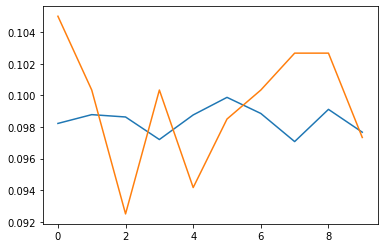

In [ ]:
plt.plot(logs.history["accuracy"])
plt.plot(logs.history["val_accuracy"])

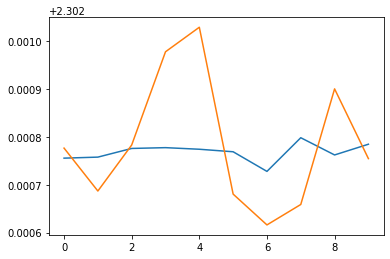

In [ ]:
plt.plot(logs.history["loss"])
plt.plot(logs.history["val_loss"])

In [ ]:
nuevos_pesos=[]
for element in pesos:
  nuevos_pesos.append( np.ones( element.shape ) )
modelo_caro.set_weights( nuevos_pesos )
modelo_caro.evaluate(img_test, etiquetas_test)
modelo_caro.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
logs = modelo_caro.fit(
    img_entrenamiento,
    etiquetas_entrenamiento,
    validation_split=0.1,
    epochs=30
)

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 159.1985 - accuracy: 0.1251 - val_loss: 2.0228 - val_accuracy: 0.2360
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 1.7377 - accuracy: 0.3609 - val_loss: 1.2536 - val_accuracy: 0.5562
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 1.4843 - accuracy: 0.4726 - val_loss: 1.1201 - val_accuracy: 0.5867
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.4050 - accuracy: 0.5093 - val_loss: 1.1095 - val_accuracy: 0.5503
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.3722 - accuracy: 0.5258 - val_loss: 1.0818 - val_accuracy: 0.5887
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.3545 - accuracy: 0.5379 - val_loss: 1.0438 - val_accuracy: 0.6368
Epoch 7/30
1688/1688 [=======================

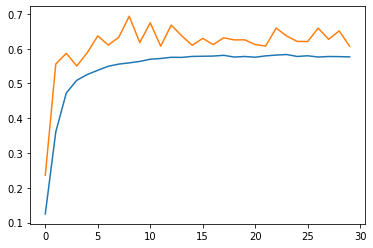

In [ ]:
plt.plot(logs.history["accuracy"])
plt.plot(logs.history["val_accuracy"])

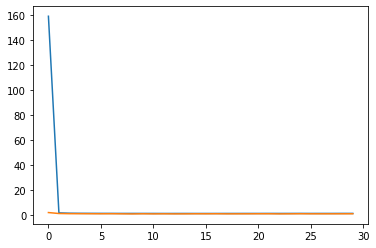

In [ ]:
plt.plot(logs.history["loss"])
plt.plot(logs.history["val_loss"])

In [ ]:
nuevos_pesos=[]
for element in pesos:
  nuevos_pesos.append( np.random.random( element.shape ) )
modelo_caro.set_weights( nuevos_pesos )
modelo_caro.evaluate(img_test, etiquetas_test)
modelo_caro.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
logs = modelo_caro.fit(
    img_entrenamiento,
    etiquetas_entrenamiento,
    validation_split=0.1,
    epochs=30
)

313/313 [==============================] - 1s 2ms/step - loss: 14905.3564 - accuracy: 0.1000
Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 1247.2085 - accuracy: 0.1308 - val_loss: 1.9547 - val_accuracy: 0.2760
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.9379 - accuracy: 0.2895 - val_loss: 1.3057 - val_accuracy: 0.5100
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6027 - accuracy: 0.3956 - val_loss: 1.2040 - val_accuracy: 0.5227
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 1.5234 - accuracy: 0.4235 - val_loss: 1.1927 - val_accuracy: 0.5207
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 1.4823 - accuracy: 0.4335 - val_loss: 1.1752 - val_accuracy: 0.5365
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 1.4645 - accuracy: 0.4389 - val_loss: 1.1612 - val_accuracy: 0.5345
Epoch 7/30
1688/1688 [==================

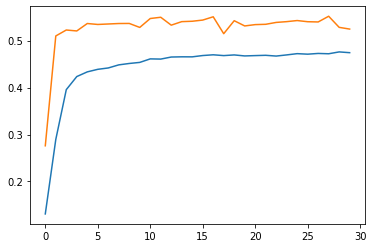

In [ ]:
plt.plot(logs.history["accuracy"])
plt.plot(logs.history["val_accuracy"])

In [ ]:
nuevos_pesos=[]
for element in pesos:
  nuevos_pesos.append( 
      np.random.normal(
          loc=0., 
          scale= (2.0/(np.sum(element.shape)))**0.5
          ,size= element.shape )
       ) #sqrt(2 / (fan_in + fan_out))
modelo_caro.set_weights( nuevos_pesos )
modelo_caro.evaluate(img_test, etiquetas_test)
modelo_caro.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
logs = modelo_caro.fit(
    img_entrenamiento,
    etiquetas_entrenamiento,
    validation_split=0.1,
    epochs=30
)

# Transfer Learning

In [ ]:
modelo_caro.layers[-1].get_weights()[0][:2]

array([[-0.2429, -0.2337,  0.0363,  0.1181,  0.1017, -0.1261,  0.1281,
         0.3546, -0.1673,  0.3464],
       [-0.2935, -0.241 ,  0.2476,  0.1963,  0.2406, -0.043 ,  0.237 ,
        -0.0203, -0.0892, -0.3312]], dtype=float32)

In [ ]:
for capa in modelo_caro.layers:
  capa.trainable = False
modelo_caro.pop()
modelo_caro.add(keras.layers.Dense(30, activation="relu", kernel_regularizer="l1",activity_regularizer="l1"))
modelo_caro.add(keras.layers.Dense(10, activation="softmax"))
modelo_caro.compile(loss="sparse_categorical_crossentropy",metrics="accuracy")
modelo_caro.fit(img_entrenamiento,etiquetas_entrenamiento)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.8058 - accuracy: 0.7094


In [ ]:
modelo_caro.layers[-1].get_weights()[0][:2]

array([[ 0.11, -0.26,  0.39, -0.19, -0.1 , -0.19,  0.42, -0.62, -0.29,
        -0.09],
       [ 0.35, -0.47, -0.36, -0.16, -0.42, -0.22,  0.03,  0.35, -0.3 ,
         0.12]], dtype=float32)

In [ ]:
modelo_caro.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 30)                1530      
                                                                 
 dense_17 (Dense)            (None, 10)              

In [ ]:
modelo_caro.evaluate(img_test,etiquetas_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.8250


[0.4879935085773468, 0.824999988079071]

## Funciones de activaciones


In [ ]:
x = np.linspace(-10,10,100)

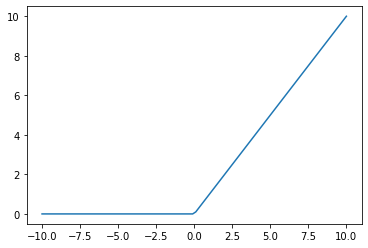

In [ ]:
relu = [ max(e,0) for e in x]
plt.plot(x,relu)

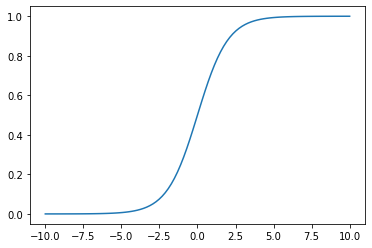

In [ ]:
sigmoide = 1 / (1 + np.exp(-x))
plt.plot(x,sigmoide)

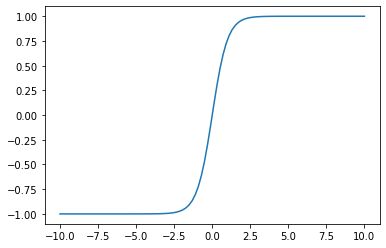

In [ ]:
tanh = np.tanh(x)
plt.plot(x,tanh)

In [ ]:
dataset = tf.constant( [[-1,1,5,8,10]], dtype=tf.float32 )
keras.activations.softmax(dataset)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=array([[0.    , 0.0001, 0.0059, 0.1185, 0.8755]], dtype=float32)>

# Optimizando la red

In [ ]:
x = np.linspace(-5,5,200)

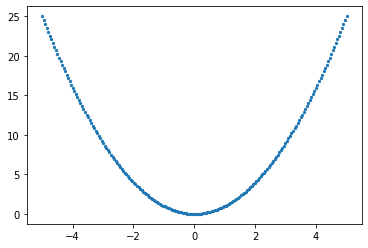

In [ ]:
plt.scatter(x,x**2,s=5)

Mejor valor mínimo:  0.030233102


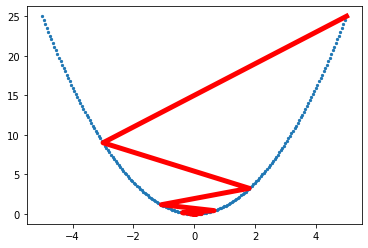

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.8)
variable_inicial = tf.Variable(5.0)
variables = [variable_inicial.numpy()]
for _ in range(10):
  sgd.minimize(lambda:variable_inicial**2 ,[variable_inicial])
  variables.append(variable_inicial.numpy())
variables = np.array(variables)
plt.scatter(x,x**2,s=5)
plt.plot(variables,variables**2,linewidth=5,c="r")
print("Mejor valor mínimo: ",variables[-1])

Mejor valor mínimo:  -7.9585766e-35


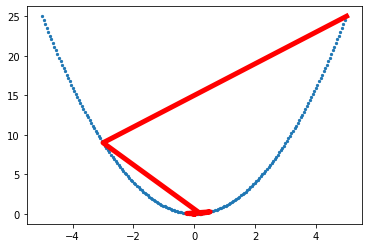

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.8, momentum=0.2)
variable_inicial = tf.Variable(5.0)
variables = [variable_inicial.numpy()]
for _ in range(100):
  sgd.minimize(lambda:variable_inicial**2 ,[variable_inicial])
  variables.append(variable_inicial.numpy())
variables = np.array(variables)
plt.scatter(x,x**2,s=5)
plt.plot(variables,variables**2,linewidth=5,c="r")
print("Mejor valor mínimo: ",variables[-1])

Mejor valor mínimo:  0.0011536886


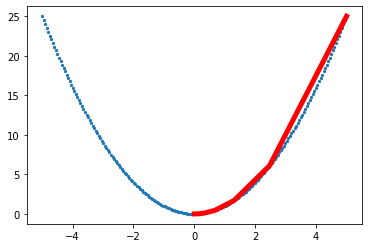

In [ ]:
sgd = keras.optimizers.RMSprop(learning_rate=0.8)
variable_inicial = tf.Variable(5.0)
variables = [variable_inicial.numpy()]
for _ in range(10):
  sgd.minimize(lambda:variable_inicial**2 ,[variable_inicial])
  variables.append(variable_inicial.numpy())
variables = np.array(variables)
plt.scatter(x,x**2,s=5)
plt.plot(variables,variables**2,linewidth=5,c="r")
print("Mejor valor mínimo: ",variables[-1])

Mejor valor mínimo:  -0.03900388


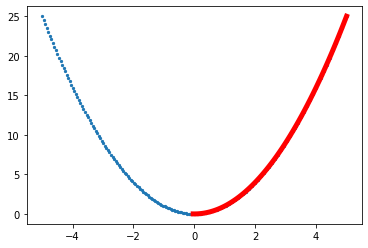

In [ ]:
sgd = keras.optimizers.Adam(learning_rate=0.1)
variable_inicial = tf.Variable(5.0)
variables = [variable_inicial.numpy()]
for _ in range(100):
  sgd.minimize(lambda:variable_inicial**2 ,[variable_inicial])
  variables.append(variable_inicial.numpy())
variables = np.array(variables)
plt.scatter(x,x**2,s=5)
plt.plot(variables,variables**2,linewidth=5,c="r")
print("Mejor valor mínimo: ",variables[-1])

## Optimizacion de pesos

In [ ]:
dataset = np.array( range(20) )
etiquetas = dataset*2+1
dataset,etiquetas

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39]))

In [ ]:
nano = keras.Sequential()
nano.add(keras.layers.Dense(1,input_shape=(1,)))
print(nano.get_weights())

[array([[-0.4862]], dtype=float32), array([0.], dtype=float32)]


In [ ]:
nano.compile(loss="mse", optimizer="sgd")
nano.fit(dataset,etiquetas)
print(nano.get_weights())

1/1 [==============================] - 0s 378ms/step - loss: 811.6301
[array([[5.8447]], dtype=float32), array([0.4924], dtype=float32)]


In [ ]:
w=-0.4862
b=0.0
error= etiquetas - (dataset*w+b)
mse = np.average(error**2)
mse

811.61481934

In [ ]:
sgd = keras.optimizers.SGD()
w_b = tf.Variable([w,b])
sgd.minimize(lambda: tf.math.reduce_mean((etiquetas - (dataset*w_b[0]+w_b[1]))**2) ,w_b)
w_b.numpy()

array([5.8447, 0.4924], dtype=float32)

### Optimizando varias épocas

In [ ]:
nano = keras.Sequential()
nano.add(keras.layers.Dense(1,input_shape=(1,)))
w=nano.get_weights()[0][0][0]
b=nano.get_weights()[1][0]
print("Pesos al inicio: {} Bias al inicio_ {}".format(w,b))
nano.compile(loss="mse", optimizer="sgd")
nano.fit(dataset,etiquetas,epochs=100,verbose=0)
print("Pesos al final: {} Bias al inicio_ {}".format(nano.get_weights()[0][0][0],nano.get_weights()[1][0]))

Pesos al inicio: 1.024098515510559 Bias al inicio_ 0.0
Pesos al final: -1.521160421334057e+17 Bias al inicio_ -1.172664584503296e+16


In [ ]:
sgd = keras.optimizers.SGD()
w_b = tf.Variable([w,b])
print("Pesos al inicio: {} Bias al inicio_ {}".format(w,b))
for _ in range(100):
  sgd.minimize(lambda: tf.math.reduce_mean((etiquetas - (dataset*w_b[0]+w_b[1]))**2) ,w_b)
print("Pesos al inicio: {} Bias al inicio_ {}".format(*w_b.numpy()))

Pesos al inicio: 1.024098515510559 Bias al inicio_ 0.0
Pesos al inicio: -1.5211611085288243e+17 Bias al inicio_ -1.172665121374208e+16


# Modelo Final

Funcionces de optimización interesantes:
http://www.sfu.ca/~ssurjano/index.html

## Minimos y maximos locales

In [ ]:
def f_sin(variable,tensorflow=False):
  if(tensorflow):
    return lambda: tf.math.sin(variable*2)+variable
  else:
    return np.sin(variable*2)+variable

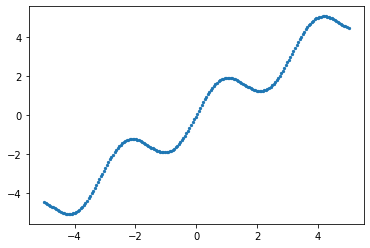

In [ ]:
x = np.linspace(-5,5,200)
y = f_sin(x)
plt.scatter(x,y,s=5)

Mejor valor mínimo:  -7.747074


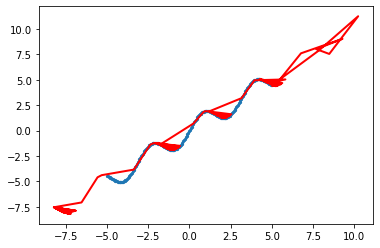

In [ ]:
sgd = keras.optimizers.RMSprop(learning_rate=0.9)
variable_inicial = tf.Variable(5.0)
variables = [variable_inicial.numpy()]
for _ in range(100):
  sgd.minimize(f_sin(variable_inicial,tensorflow=True) ,[variable_inicial])
  variables.append(variable_inicial.numpy())
variables = np.array(variables)
plt.scatter(x,y,s=5)
plt.plot(variables,f_sin(variables),linewidth=2,c="r")
print("Mejor valor mínimo: ",variables[-1])

## Construcción de la red

In [61]:
print(etiquetas_entrenamiento[:2])
n_etiquetas = keras.utils.to_categorical(etiquetas_entrenamiento)
n_etiquetas_test = keras.utils.to_categorical(etiquetas_test)
print(n_etiquetas[:2])

[9 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [63]:
modelo_caro = keras.models.load_model("/content/drive/MyDrive/alura/deep_learning_2/modelo_inicial_caro.h5")
modelo_caro.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-tra

In [68]:
modelo_caro = keras.models.load_model("/content/drive/MyDrive/alura/deep_learning_2/modelo_inicial_caro.h5")
modelo_caro.evaluate(img_test,etiquetas_test)
for capa in modelo_caro.layers:
  capa.trainable = False
modelo_caro.pop()
modelo_caro.add(keras.layers.Dense(200, activation="relu",activity_regularizer="l2", name="dense_100"))
modelo_caro.add(keras.layers.Dropout(0.5, name="dropout_06"))
modelo_caro.add(keras.layers.Dense(10, activation="softmax"))
modelo_caro.summary()

313/313 [==============================] - 1s 1ms/step - loss: 0.6084 - accuracy: 0.8111
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_100 (Dense)           (None, 200)               10200     
                              

In [ ]:
nombre_modelo="Final"
log_dir="/content/drive/MyDrive/alura/logs_deep_learning_2/{}".format(nombre_modelo)
opt = keras.optimizers.Adam(learning_rate=0.0001)
n_etiquetas = keras.utils.to_categorical(etiquetas_entrenamiento)
# loss regresión: mae, mse
# metrics regresión: root_mean_squared_error

callbacks=[
          keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1),
          keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=10),
          keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/alura/deep_learning_2/mi_modelo_2.h5",
                                          save_best_only=True, monitor="val_accuracy")
]

modelo_caro.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy","Precision","Recall"])
epochs= 100
batch_size= 64
modelo_caro.fit(img_entrenamiento,n_etiquetas, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 4s 4ms/step - loss: 2.7635 - accuracy: 0.3883 - precision: 0.6190 - recall: 0.1553 - val_loss: 1.2315 - val_accuracy: 0.8089 - val_precision: 0.9897 - val_recall: 0.2953
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 1.6598 - accuracy: 0.6225 - precision: 0.8572 - recall: 0.3013 - val_loss: 1.0945 - val_accuracy: 0.8146 - val_precision: 0.9844 - val_recall: 0.3623
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 1.4139 - accuracy: 0.6775 - precision: 0.8752 - recall: 0.3706 - val_loss: 0.9801 - val_accuracy: 0.8188 - val_precision: 0.9767 - val_recall: 0.4577
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 1.2911 - accuracy: 0.6941 - precision: 0.8736 - recall: 0.4189 - val_loss: 0.8970 - val_accuracy: 0.8222 - val_precision: 0.9674 - val_recall: 0.5270
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 1.2003 - accuracy: 0.7101

In [ ]:
modelo_final = keras.models.load_model("/content/drive/MyDrive/alura/deep_learning_2/mi_modelo_2.h5")
modelo_final.evaluate(img_test,n_etiquetas_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.8277 - precision: 0.8876 - recall: 0.7657


[0.5308758020401001,
 0.8277000188827515,
 0.8875622749328613,
 0.7656999826431274]